In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../Speed Dating Data.csv")

In [3]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## Age Distribution 

In [4]:
df[["age"]].describe()

,age
count,8283.000000
mean,26.358928
std,3.566763
min,18.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,55.000000


(array([ 376., 3249., 3263.,  909.,  418.,   42.,   20.,    0.,    0.,
           6.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ]),
 <a list of 10 Patch objects>)

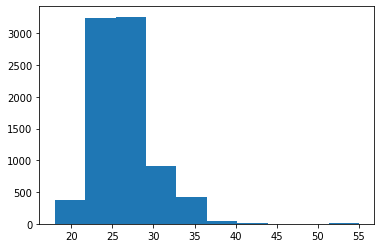

In [5]:
plt.hist(df["age"])

## Class imbalance

In [6]:
match_count = pd.crosstab(index=df['match'],columns="count")
match_count

col_0,count
match,
0,6998
1,1380


In [7]:
print(f"Match Yes {match_count.iloc[0] / df.shape[0]}")
print(f"Match Yes {match_count.iloc[1] / df.shape[0]}")

Match Yes col_0
count    0.835283
Name: 0, dtype: float64
Match Yes col_0
count    0.164717
Name: 1, dtype: float64


## Unrequited Response

In [10]:
unrequited = len(df[(df['dec_o']==0) & (df['dec']==1)]) + len(df[(df['dec_o']==1) & (df['dec']==0)])

print(f"Percent of unrequited responses { (unrequited / len(df)) * 100 }")

Percent of unrequited responses 51.00262592504178


## Which gender decides more against a date?

In [11]:
women_dec_no = len(df[(df['dec']==0) & (df['gender']==0)])
women_all = len(df[(df['gender']==0)])

men_dec_no = len(df[(df['dec']==0) & (df['gender']==1)])
men_all = len(df[(df['gender']==1)])

print(f"Women rejection rate: {(women_dec_no/women_all)*100}")
print(f"Men rejection rate: {(men_dec_no/men_all)*100}")

Women rejection rate: 63.456022944550675
Men rejection rate: 52.57510729613733


In [12]:
women_dec_no = len(df[(df['dec']==0) & (df['gender']==0) & (df['dec_o']==1)])
unrequited = len(df[(df['dec']==0) & (df['dec_o']==1)])

men_dec_no = len(df[(df['dec']==0) & (df['gender']==1) & (df['dec_o']==1)])

print(f"Women rejection rate: {(women_dec_no/unrequited)*100}")
print(f"Men rejection rate: {(men_dec_no/unrequited)*100}")

Women rejection rate: 60.702576112412174
Men rejection rate: 39.297423887587826


## Rejection rate towards attributes

In [82]:
attributes = df[['attr','sinc','intel','fun','like','int_corr', 'match',"dec", "gender", 
                 "amb", "samerace", "exphappy", "prob"]]

In [83]:
attributes_clean = attributes.dropna()

In [84]:
attributes_clean.describe()

,attr,sinc,intel,fun,like,int_corr,match,dec,gender,amb,samerace,exphappy,prob
count,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,6.177874,7.160441,7.354953,6.393336,6.121880,0.196182,0.169951,0.428161,0.504242,6.767241,0.396004,5.526409,5.231390
std,1.945595,1.743730,1.551310,1.946531,1.833296,0.304534,0.375615,0.494846,0.500016,1.790333,0.489099,1.743192,2.128123
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,5.000000,-0.020000,0.000000,0.000000,0.000000,6.000000,0.000000,5.000000,4.000000
50%,6.000000,7.000000,7.000000,7.000000,6.000000,0.210000,0.000000,0.000000,1.000000,7.000000,0.000000,6.000000,5.000000
75%,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,0.000000,1.000000,1.000000,8.000000,1.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,1.000000,1.000000,1.000000,10.000000,1.000000,10.000000,10.000000


In [85]:
attributes_clean['gender'] = np.where(attributes_clean['gender'] == 0, "Women", 
                                      attributes_clean['gender'])

attributes_clean['gender'] = np.where(attributes_clean['gender'] == "1", "Men", 
                                      attributes_clean['gender'])

<ipython-input-85-798690d5f73d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_clean['gender'] = np.where(attributes_clean['gender'] == 0, "Women",
<ipython-input-85-798690d5f73d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_clean['gender'] = np.where(attributes_clean['gender'] == "1", "Men",


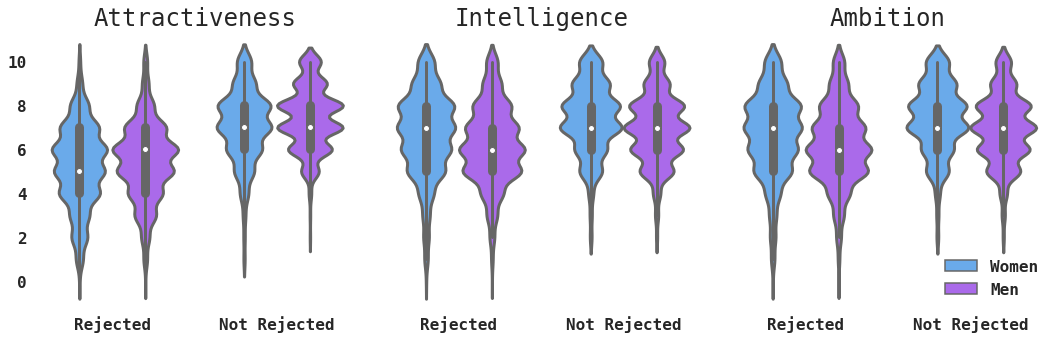

In [86]:
#plt.figure(figsize=(7,9))
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}
#rc('font', **font)


plt.style.use("seaborn-white")
plt.rc('font', **
       font)
plt.rc('axes', titlesize=24)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)

g1 = sns.violinplot(x='dec', y='attr', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[0], inner="box")
#sns.swarmplot(x="dec", y="attr", data=attributes_clean,color="white", edgecolor="gray")
g2 = sns.violinplot(x='dec', y='amb', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[1],  inner="box")
g3 = sns.violinplot(x='dec', y='amb', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[2], inner="box")

axes[0].set_ylabel("")
axes[0].grid(False)

#axes[0].set_facecolor("gray")

axes[0].set_title("Attractiveness")
axes[1].set_title("Intelligence")
axes[2].set_title("Ambition")

for pos in ['right', 'top', 'bottom', 'left']:
    axes[0].spines[pos].set_visible(False)
    
for pos in ['right', 'top', 'bottom', 'left']:
    axes[1].spines[pos].set_visible(False)
    
for pos in ['right', 'top', 'bottom', 'left']:
    axes[2].spines[pos].set_visible(False)

axes[0].set_xticklabels(["Rejected", "Not Rejected"])
axes[1].set_xticklabels(["Rejected", "Not Rejected"])
axes[2].set_xticklabels(["Rejected", "Not Rejected"])

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

axes[0].get_legend().remove()
axes[1].get_legend().remove()
#g3.legend.set_title("")
g3.legend(title="")

plt.tight_layout()
plt.savefig("rejection.png")
plt.show()


## Interest Overlap